In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU
import pickle
from keras.models import load_model

In [101]:
df=pd.read_csv("E:/Data Science Project/Final Project/final_project.csv")
df

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday,Day,Week,Month,Year,Weekly_Sales_Lag1,Markdown_Holiday_Impact
0,1,1,151315,1,24924.50,42.31,2.572,0.00,0.00,0.00,...,0.00,211.096358,8.106,0,5,5,2,2010,0.00,0.0
1,1,1,151315,1,46039.49,38.51,2.548,0.00,0.00,0.00,...,0.00,211.242170,8.106,1,12,6,2,2010,24924.50,0.0
2,1,1,151315,1,41595.55,39.93,2.514,0.00,0.00,0.00,...,0.00,211.289143,8.106,0,19,7,2,2010,46039.49,0.0
3,1,1,151315,1,19403.54,46.63,2.561,0.00,0.00,0.00,...,0.00,211.319643,8.106,0,26,8,2,2010,41595.55,0.0
4,1,1,151315,1,21827.90,46.50,2.625,0.00,0.00,0.00,...,0.00,211.350143,8.106,0,5,9,3,2010,19403.54,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,508.37,64.88,3.997,4556.61,20.64,1.50,...,3288.25,192.013558,8.684,0,28,39,9,2012,467.30,0.0
421566,45,2,118221,98,628.10,64.89,3.985,5046.74,0.00,18.82,...,2340.01,192.170412,8.667,0,5,40,10,2012,508.37,0.0
421567,45,2,118221,98,1061.02,54.47,4.000,1956.28,0.00,7.89,...,3990.54,192.327265,8.667,0,12,41,10,2012,628.10,0.0
421568,45,2,118221,98,760.01,56.47,3.969,2004.02,0.00,3.18,...,1537.49,192.330854,8.667,0,19,42,10,2012,1061.02,0.0


In [102]:
x=df.drop("Weekly_Sales",axis=1)
y=df["Weekly_Sales"]

In [103]:
x

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Week,Month,Year,Weekly_Sales_Lag1,Markdown_Holiday_Impact
0,1,1,151315,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,5,5,2,2010,0.00,0.0
1,1,1,151315,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1,12,6,2,2010,24924.50,0.0
2,1,1,151315,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,19,7,2,2010,46039.49,0.0
3,1,1,151315,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,26,8,2,2010,41595.55,0.0
4,1,1,151315,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,5,9,3,2010,19403.54,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,0,28,39,9,2012,467.30,0.0
421566,45,2,118221,98,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,0,5,40,10,2012,508.37,0.0
421567,45,2,118221,98,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,0,12,41,10,2012,628.10,0.0
421568,45,2,118221,98,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,0,19,42,10,2012,1061.02,0.0


In [104]:
y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [83]:
scaler=StandardScaler()
scaler.fit(x)
x_new=scaler.transform(x)

In [84]:
x_new_df=pd.DataFrame(x_new,columns=x.columns)
x_new_df

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Week,Month,Year,Weekly_Sales_Lag1,Markdown_Holiday_Impact
0,-1.658199,-0.885307,0.239209,-1.418742,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,0.078201,-0.275106,-1.219293,-1.471661,-1.371945,-1.215487,-0.703674,-0.135351
1,-1.658199,-0.885307,0.239209,-1.418742,-1.169783,-1.773177,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.022498,0.078201,3.634961,-0.419617,-1.400999,-1.371945,-1.215487,0.393782,-0.135351
2,-1.658199,-0.885307,0.239209,-1.418742,-1.092810,-1.847330,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.023697,0.078201,-0.275106,0.380060,-1.330337,-1.371945,-1.215487,1.323501,-0.135351
3,-1.658199,-0.885307,0.239209,-1.418742,-0.729625,-1.744825,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.024476,0.078201,-0.275106,1.179736,-1.259675,-1.371945,-1.215487,1.127829,-0.135351
4,-1.658199,-0.885307,0.239209,-1.418742,-0.736672,-1.605243,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.025255,0.078201,-0.275106,-1.219293,-1.189013,-1.063609,-1.215487,0.150687,-0.135351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.783258,0.615438,-0.303489,1.762418,0.259647,1.387032,0.324919,-0.169009,-0.084391,0.132976,0.386317,0.531461,0.388404,-0.275106,1.408215,0.930848,0.786408,1.294317,-0.683098,-0.135351
421566,1.783258,0.615438,-0.303489,1.762418,0.260189,1.360860,0.405901,-0.173069,-0.081259,0.300498,0.160955,0.535467,0.379281,-0.275106,-1.219293,1.001510,1.094744,1.294317,-0.681290,-0.135351
421567,1.783258,0.615438,-0.303489,1.762418,-0.304645,1.393575,-0.104718,-0.173069,-0.083235,-0.124229,0.553226,0.539472,0.379281,-0.275106,-0.419617,1.072172,1.094744,1.294317,-0.676018,-0.135351
421568,1.783258,0.615438,-0.303489,1.762418,-0.196231,1.325965,-0.096830,-0.173069,-0.084087,-0.165720,-0.029775,0.539564,0.379281,-0.275106,0.380060,1.142834,1.094744,1.294317,-0.656956,-0.135351


In [85]:
y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2)

In [87]:
x_new_df.shape[1]

20

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 120)            │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,711 (116.06 KB)

 Trainable params: 29,711 (116.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 104671176.0000 - val_loss: 45595148.0000
Epoch 2/30
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 37165816.0000 - val_loss: 42753008.0000
Epoch 3/30
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 41287208.0000 - val_loss: 40816852.0000
Epoch 4/30
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 38937008.0000 - val_loss: 39925900.0000
Epoch 5/30
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 35489000.0000 - val_loss: 39134440.0000
Epoch 6/30
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 35681008.0000 - val_loss: 38314252.0000
Epoch 7/30
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 32076830.0000 - val_loss: 44497568.0000
Epoch 8/30
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 33699152.0000 - val_loss: 37557224.0000
Epoch 9/30
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 31234410.0000 - val_loss: 38332704.0000
Epoch 10/30
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 30520318

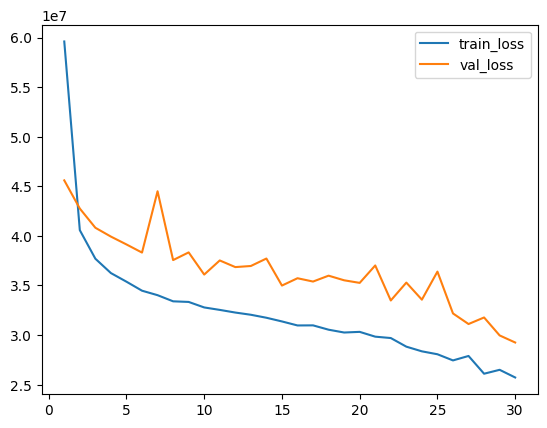

In [88]:
model=Sequential()

model.add(Dense(120,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-1
model.add(Dense(100,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-2
model.add(Dense(80,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-3
model.add(Dense(60,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-4
model.add(Dense(30,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5
model.add(Dense(10,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-6
model.add(Dense(1)) #output layer

model.compile(optimizer="adam", loss='mean_squared_error')

model.summary()

result=model.fit(x_train,y_train,epochs=30,validation_split=0.2,batch_size=32)

result_df=pd.DataFrame(result.history)

plt.plot(range(1,31),result_df['loss'],label="train_loss")
plt.plot(range(1,31),result_df['val_loss'],label="val_loss")
plt.legend()
plt.show()



Dropping Weekly_Sales_Lag1 and Markdown_Holiday_Impact columns

In [105]:
x1=df.drop(["Weekly_Sales","Weekly_Sales_Lag1","Markdown_Holiday_Impact"],axis=1)
y1=df["Weekly_Sales"]

In [138]:
df1=df.copy()
df1.drop(["Weekly_Sales_Lag1","Markdown_Holiday_Impact"],axis=1,inplace=True)
df1

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Week,Month,Year
0,1,1,151315,1,24924.50,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,5,5,2,2010
1,1,1,151315,1,46039.49,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1,12,6,2,2010
2,1,1,151315,1,41595.55,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,19,7,2,2010
3,1,1,151315,1,19403.54,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,26,8,2,2010
4,1,1,151315,1,21827.90,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,508.37,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,0,28,39,9,2012
421566,45,2,118221,98,628.10,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,0,5,40,10,2012
421567,45,2,118221,98,1061.02,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,0,12,41,10,2012
421568,45,2,118221,98,760.01,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,0,19,42,10,2012


In [139]:
df1.to_csv("Retail_final_project.csv",index=False)

In [106]:
scaler=StandardScaler()
x1_new=scaler.fit_transform(x1)
x1_new

array([[-1.65819926, -0.8853067 ,  0.23920895, ..., -1.47166146,
        -1.37194493, -1.21548691],
       [-1.65819926, -0.8853067 ,  0.23920895, ..., -1.40099942,
        -1.37194493, -1.21548691],
       [-1.65819926, -0.8853067 ,  0.23920895, ..., -1.33033738,
        -1.37194493, -1.21548691],
       ...,
       [ 1.78325781,  0.61543819, -0.30348902, ...,  1.07217195,
         1.09474444,  1.29431678],
       [ 1.78325781,  0.61543819, -0.30348902, ...,  1.14283399,
         1.09474444,  1.29431678],
       [ 1.78325781,  0.61543819, -0.30348902, ...,  1.21349603,
         1.09474444,  1.29431678]])

In [107]:
x1_new_df=pd.DataFrame(x1_new,columns=x1.columns)
x1_new_df

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Week,Month,Year
0,-1.658199,-0.885307,0.239209,-1.418742,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,0.078201,-0.275106,-1.219293,-1.471661,-1.371945,-1.215487
1,-1.658199,-0.885307,0.239209,-1.418742,-1.169783,-1.773177,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.022498,0.078201,3.634961,-0.419617,-1.400999,-1.371945,-1.215487
2,-1.658199,-0.885307,0.239209,-1.418742,-1.092810,-1.847330,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.023697,0.078201,-0.275106,0.380060,-1.330337,-1.371945,-1.215487
3,-1.658199,-0.885307,0.239209,-1.418742,-0.729625,-1.744825,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.024476,0.078201,-0.275106,1.179736,-1.259675,-1.371945,-1.215487
4,-1.658199,-0.885307,0.239209,-1.418742,-0.736672,-1.605243,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.025255,0.078201,-0.275106,-1.219293,-1.189013,-1.063609,-1.215487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.783258,0.615438,-0.303489,1.762418,0.259647,1.387032,0.324919,-0.169009,-0.084391,0.132976,0.386317,0.531461,0.388404,-0.275106,1.408215,0.930848,0.786408,1.294317
421566,1.783258,0.615438,-0.303489,1.762418,0.260189,1.360860,0.405901,-0.173069,-0.081259,0.300498,0.160955,0.535467,0.379281,-0.275106,-1.219293,1.001510,1.094744,1.294317
421567,1.783258,0.615438,-0.303489,1.762418,-0.304645,1.393575,-0.104718,-0.173069,-0.083235,-0.124229,0.553226,0.539472,0.379281,-0.275106,-0.419617,1.072172,1.094744,1.294317
421568,1.783258,0.615438,-0.303489,1.762418,-0.196231,1.325965,-0.096830,-0.173069,-0.084087,-0.165720,-0.029775,0.539564,0.379281,-0.275106,0.380060,1.142834,1.094744,1.294317


In [108]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_new,y1, test_size=0.2, random_state=42)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 120)            │         2,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,471 (115.12 KB)

 Trainable params: 29,471 (115.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 458128512.0000 - mean_absolute_error: 13571.4150 - mean_squared_error: 458128512.0000 - root_mean_squared_error: 21366.1152 - val_loss: 395414656.0000 - val_mean_absolute_error: 11573.0205 - val_mean_squared_error: 395414656.0000 - val_root_mean_squared_error: 19885.0352
Epoch 2/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 383182784.0000 - mean_absolute_error: 12026.5645 - mean_squared_error: 383182784.0000 - root_mean_squared_error: 19572.2910 - val_loss: 365152736.0000 - val_mean_absolute_error: 11436.0879 - val_mean_squared_error: 365152736.0000 - val_root_mean_squared_error: 19108.9707
Epoch 3/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 354517920.0000 - mean_absolute_error: 11555.9834 - mean_squared_error: 354517920.0000 - root_mean_squared_error: 18825.4609 - val_loss: 302820640.0000 - val_mean_absolute_error: 10871.2539 - val_mean_squared_error: 302820640.0000 - val_root_mean_squared_error: 17401.

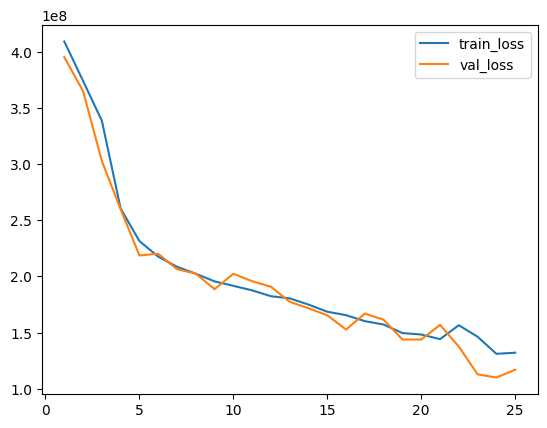

In [93]:
model1=Sequential()

model1.add(Dense(120,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-1
model1.add(Dense(100,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-2
model1.add(Dense(80,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-3
model1.add(Dense(60,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-4
model1.add(Dense(30,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5
model1.add(Dense(10,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-6
model1.add(Dense(1)) #output layer

model1.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error','root_mean_squared_error'])

model1.summary()

result1=model1.fit(x1_train,y1_train,epochs=25,validation_split=0.2,batch_size=32)

result_df1=pd.DataFrame(result1.history)

plt.plot(range(1,26),result_df1['loss'],label="train_loss")
plt.plot(range(1,26),result_df1['val_loss'],label="val_loss")
plt.legend()
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)               │ (None, 156)            │         3,276 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 156)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 128)            │        20,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 102)            │        13,158 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 102)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 84)             │         8,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 62)             │         5,270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 62)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 46)             │         2,898 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 46)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 22)             │         1,034 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 10)             │           230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,625 (213.38 KB)

 Trainable params: 54,625 (213.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 64s 6ms/step - loss: 162082800.0000 - mean_absolute_error: 6181.3735 - mean_absolute_percentage_error: 608821760.0000 - mean_squared_error: 162082800.0000 - mean_squared_logarithmic_error: 4.1342 - val_loss: 56713480.0000 - val_mean_absolute_error: 2833.6841 - val_mean_absolute_percentage_error: 537831424.0000 - val_mean_squared_error: 56713480.0000 - val_mean_squared_logarithmic_error: 1.0853
Epoch 2/20
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - loss: 91045600.0000 - mean_absolute_error: 4346.3193 - mean_absolute_percentage_error: 348494176.0000 - mean_squared_error: 91045600.0000 - mean_squared_logarithmic_error: 1.4316 - val_loss: 53062612.0000 - val_mean_absolute_error: 2706.6504 - val_mean_absolute_percentage_error: 574809344.0000 - val_mean_squared_error: 53062612.0000 - val_mean_squared_logarithmic_error: 1.2044
Epoch 3/20
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - loss: 85034104.0000 - mean_absolute_error: 4192.2397 - mean_absolut

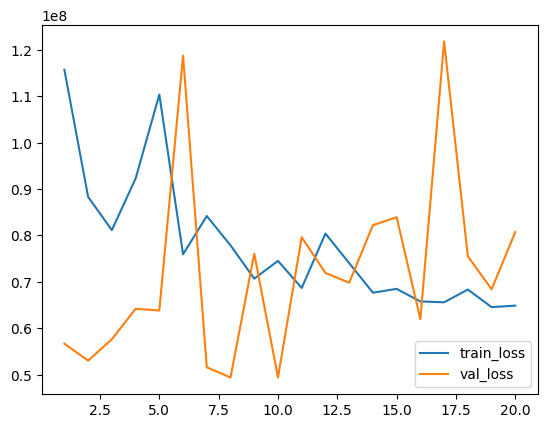

In [109]:
model2=Sequential()

model2.add(Dense(156,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-1
model2.add(Dropout(0.3))
model2.add(Dense(128,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-2
model2.add(Dropout(0.3))
model2.add(Dense(102,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-3
model2.add(Dropout(0.3))
model2.add(Dense(84,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-4
model2.add(Dropout(0.2))
model2.add(Dense(62,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5
model2.add(Dropout(0.2))
model2.add(Dense(46,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-6
model2.add(Dropout(0.2))
model2.add(Dense(22,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-7
model2.add(Dropout(0.1))
model2.add(Dense(10,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-8
model2.add(Dropout(0.1))
model2.add(Dense(1)) #output layer

model2.compile(optimizer="adam", loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanSquaredLogarithmicError()])

model2.summary()

result2=model2.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=32)

result_df2=pd.DataFrame(result2.history)

plt.plot(range(1,21),result_df2['loss'],label="train_loss")
plt.plot(range(1,21),result_df2['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [113]:
model3=Sequential()

model3.add(Dense(156,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-1
model3.add(Dropout(0.3))
model3.add(Dense(128,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-2
model3.add(Dropout(0.3))
model3.add(Dense(102,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-3
model3.add(Dropout(0.3))
model3.add(Dense(84,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-4
model3.add(Dropout(0.2))
model3.add(Dense(62,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5
model3.add(Dropout(0.2))
model3.add(Dense(46,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-6
model3.add(Dropout(0.2))
model3.add(Dense(22,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-7
model3.add(Dropout(0.1))
model3.add(Dense(10,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-8
model3.add(Dropout(0.1))
model3.add(Dense(1)) #output layer

model3.compile(optimizer="adam", loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanSquaredLogarithmicError()])

model3.summary()

result3=model3.fit(x1_train,y1_train,epochs=50,validation_split=0.2,batch_size=32)

result_df3=pd.DataFrame(result3.history)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)               │ (None, 156)            │         2,964 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 156)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 128)            │        20,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 102)            │        13,158 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 102)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 84)             │         8,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 62)             │         5,270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (None, 62)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 46)             │         2,898 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_101 (Dropout)           │ (None, 46)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 22)             │         1,034 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 10)             │           230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_103 (Dropout)           │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,313 (212.16 KB)

 Trainable params: 54,313 (212.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 64s 7ms/step - loss: 457443968.0000 - mean_absolute_error: 13290.9580 - mean_absolute_percentage_error: 2423927040.0000 - mean_squared_error: 457443968.0000 - mean_squared_logarithmic_error: 5.9539 - val_loss: 386562848.0000 - val_mean_absolute_error: 11771.1113 - val_mean_absolute_percentage_error: 2312533760.0000 - val_mean_squared_error: 386562848.0000 - val_mean_squared_logarithmic_error: 4.0794
Epoch 2/50
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - loss: 408385920.0000 - mean_absolute_error: 12320.3516 - mean_absolute_percentage_error: 1527794688.0000 - mean_squared_error: 408385920.0000 - mean_squared_logarithmic_error: 4.2170 - val_loss: 380531264.0000 - val_mean_absolute_error: 11592.5146 - val_mean_absolute_percentage_error: 2368207104.0000 - val_mean_squared_error: 380531264.0000 - val_mean_squared_logarithmic_error: 3.9858
Epoch 3/50
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - loss: 403735616.0000 - mean_absolute_error: 12196.966

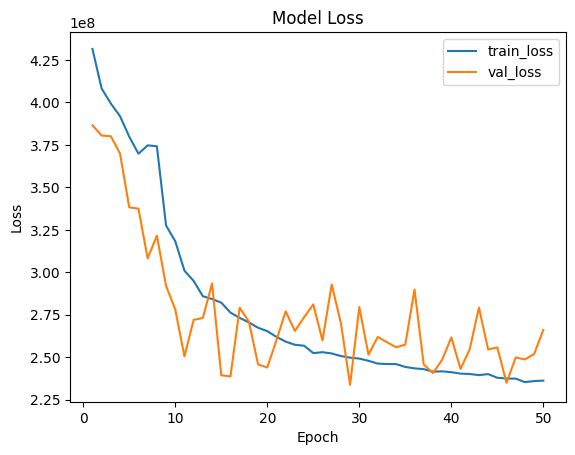

In [114]:
plt.plot(range(1,51),result_df3['loss'],label="train_loss")
plt.plot(range(1,51),result_df3['val_loss'],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.show()

In [ ]:
model1.add(Dense(120,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-1
model1.add(Dense(100,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-2
model1.add(Dense(80,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-3
model1.add(Dense(60,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-4
model1.add(Dense(30,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5
model1.add(Dense(10,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-6
model1.add(Dense(1)) #output layer


In [128]:
model4=Sequential()

model4.add(Dense(132,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-1
model4.add(Dropout(0.2))
model4.add(Dense(112,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-2
model4.add(Dropout(0.2))
model4.add(Dense(96,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-3
model4.add(Dropout(0.2))
model4.add(Dense(72,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-4
model4.add(Dropout(0.2))
model4.add(Dense(56,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5
model4.add(Dropout(0.2))
model4.add(Dense(24,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-6
model4.add(Dropout(0.1))
model4.add(Dense(12,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-7
model4.add(Dropout(0.1))
model4.add(Dense(1)) #output layer

model4.compile(optimizer="adam", loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanSquaredLogarithmicError()])

model4.summary()

result4=model4.fit(x1_train,y1_train,epochs=50,validation_split=0.2,batch_size=32)

result_df4=pd.DataFrame(result4.history)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_192 (Dense)               │ (None, 132)            │         2,508 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_146 (Dropout)           │ (None, 132)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 112)            │        14,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_147 (Dropout)           │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 96)             │        10,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_148 (Dropout)           │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 72)             │         6,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_149 (Dropout)           │ (None, 72)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 56)             │         4,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_150 (Dropout)           │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_197 (Dense)               │ (None, 24)             │         1,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_151 (Dropout)           │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_198 (Dense)               │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_152 (Dropout)           │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,005 (160.18 KB)

 Trainable params: 41,005 (160.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - loss: 455576352.0000 - mean_absolute_error: 13344.4297 - mean_absolute_percentage_error: 1447012352.0000 - mean_squared_error: 455576352.0000 - mean_squared_logarithmic_error: 5.7791 - val_loss: 392002752.0000 - val_mean_absolute_error: 11629.6191 - val_mean_absolute_percentage_error: 2492778240.0000 - val_mean_squared_error: 392002752.0000 - val_mean_squared_logarithmic_error: 4.0903
Epoch 2/50
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 87s 10ms/step - loss: 398657376.0000 - mean_absolute_error: 12216.3193 - mean_absolute_percentage_error: 1730456832.0000 - mean_squared_error: 398657376.0000 - mean_squared_logarithmic_error: 4.1875 - val_loss: 376174208.0000 - val_mean_absolute_error: 11609.9600 - val_mean_absolute_percentage_error: 2364442624.0000 - val_mean_squared_error: 376174208.0000 - val_mean_squared_logarithmic_error: 4.0382
Epoch 3/50
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 128s 15ms/step - loss: 394674464.0000 - mean_absolute_error: 12069.

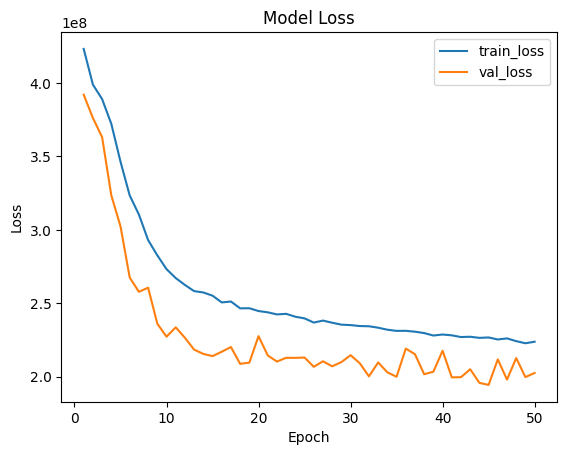

In [129]:
plt.plot(range(1,51),result_df4['loss'],label="train_loss")
plt.plot(range(1,51),result_df4['val_loss'],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.show()

In [136]:
#Prediction
y1_pred=model1.predict(x1_test)
#Evaluation
MAE=mean_absolute_error(y1_test,y1_pred)
MSE=mean_squared_error(y1_test,y1_pred)
RMSE=np.sqrt(MSE)
R2=r2_score(y1_test,y1_pred)
#print the evaluation metrics
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2: {R2}")

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
MAE: 5966.81438890735
MSE: 121840029.19611357
RMSE: 11038.117103750692
R2: 0.7663531991995676


In [137]:
model1.save("Retail_model.h5")

In [142]:
with open ("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [145]:
# Load the model with custom objects
loaded_model = load_model("E:/Data Science Project/Final Project/Retail_model.h5", 
                        custom_objects={'LeakyReLU': LeakyReLU})

In [146]:
with open("scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

In [147]:
loaded_model.predict(x1_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


array([[40147.863],
       [15642.404],
       [ 5006.032],
       ...,
       [10781.531],
       [16399.29 ],
       [46361.152]], dtype=float32)

In [149]:
user_input=np.array([[1,1,151315,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,5,5,2,2010]])
scaled_input=scaler.transform(user_input)
predict=loaded_model.predict(scaled_input)
predict

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[36805.684]], dtype=float32)

In [155]:
predict

array([[36805.684]], dtype=float32)